# **1.1 Importing Dependencies:**

In [81]:
import pandas as pd #for visualization of data in tabular format
import matplotlib.pyplot as plt #for plotting the data
import seaborn as sns  #for enhancing the plots with more statistical and visual features
from sklearn.model_selection import train_test_split # for Splitting dataset into training and test-data
from sklearn.preprocessing import StandardScaler # for feature Scaling (standardization)

#Machine Learning Models:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import pickle

from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.2 Downloading and Loading the Dataset**

In [3]:
!pip install kaggle #Install the Kaggle library
!kaggle datasets download -d mathchi/churn-for-bank-customers --unzip # Download the dataset

Dataset URL: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers
License(s): CC0-1.0
  0% 0.00/261k [00:00<?, ?B/s]
100% 261k/261k [00:00<00:00, 71.7MB/s]


In [4]:
# Load the dataset
df = pd.read_csv('churn.csv')
df.head() #Display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **1.3 Interpreting the DataFrame**


Text(0, 0.5, 'Count')

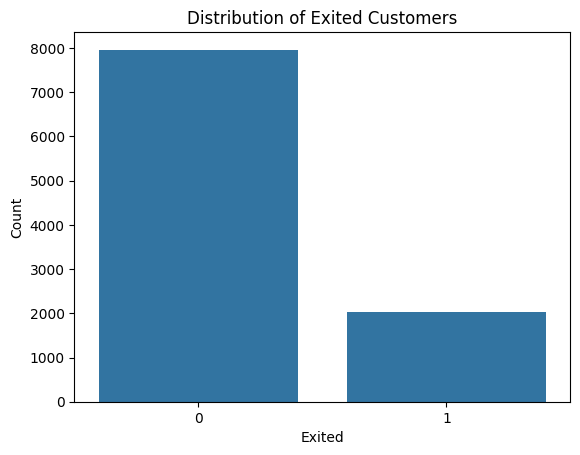

In [5]:
sns.countplot(x='Exited', data=df) #Plot in which x-axis shows the two values of Exited (0 and 1), while the y-axis shows the count of customers for each category.
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')

# "0" (non-churned), "1" (churned)
# there are imbalance to consider , we might need to use Over-sampling or under-sampling techniques.

Text(0.5, 1.0, 'Age Distribution of Customers')

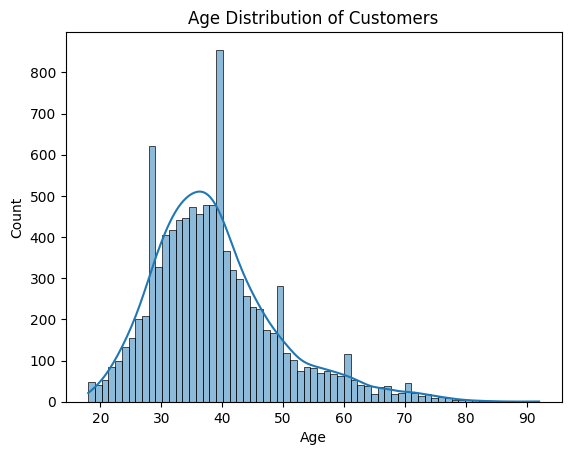

In [6]:
#age distribution
sns.histplot(data=df, x='Age', kde=True) # kde=True adds a Kernel Density Estimate (KDE) curve to the histogram.
plt.title('Age Distribution of Customers')

Text(0.5, 1.0, 'Credit Score vs Age')

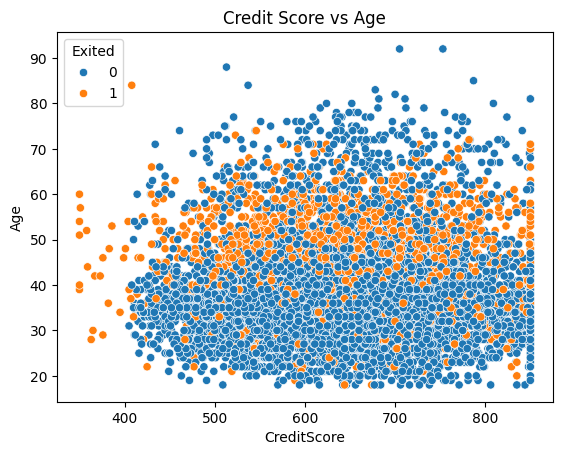

In [7]:
#scatter plot: "Credit score vs Age"
sns.scatterplot(data=df, x='CreditScore', y='Age' , hue='Exited') #hue='Exited': This argument adds color coding to the points on the plot based on the Exited column. For visual identification of churned customers, Orange = 1 ("Churned") & Blue = 0 ('Not Churned")
plt.title('Credit Score vs Age')

Text(0.5, 1.0, ' Balance Distribution by Churn')

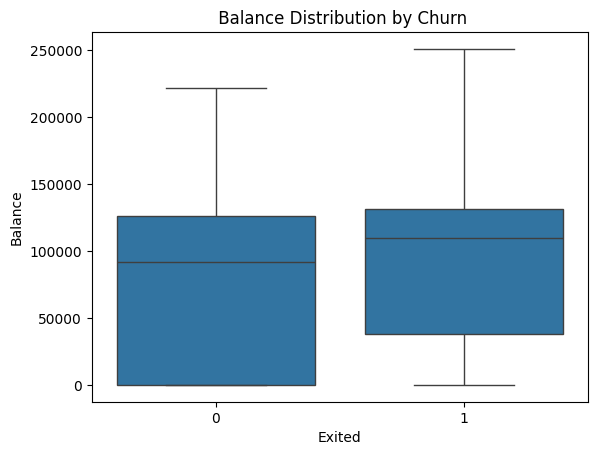

In [8]:
# box plot of customers account balance sep by whether the customer churned or not
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title(' Balance Distribution by Churn')

#high-value customers (those with higher balances) are at a greater risk of leaving the bank.

Text(0.5, 1.0, 'Credit Score Distribution by Churn')

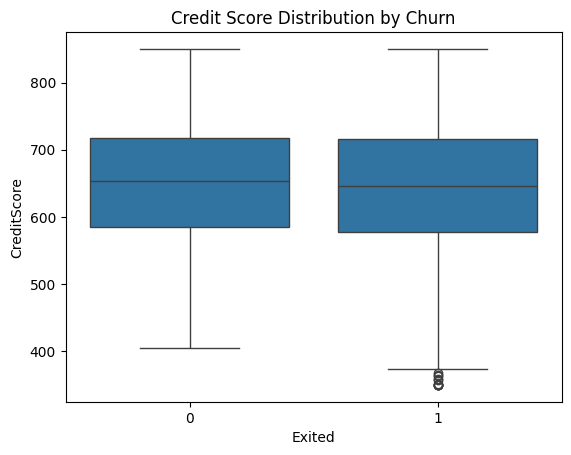

In [9]:
#This visualization helps to understand if there's a noticeable difference in credit scores between these groups,
#potentially indicating if credit score is a factor in customer churn.

sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Churn')

# **2.1 Data Cleaning & Pre-Processing**


In [10]:
# Pre-process the Data:
#crucial step in this process is separating the features (input variables) from the target variable (what we want to predict)

features = df.drop('Exited', axis=1) #axis=1: This argument tells the drop() method to drop a column. axis=0 would drop a row.

#features: This is a variable that will store the features of our dataset.
# We're essentially creating a new dataset without the target variable.

In [11]:
#target: This is a variable that will store the target variable, which is what the model will be trying to predict.
target=df['Exited']

In [12]:
#drop unnecessary column
features = features.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#data preprocessing step called feature selection.
#It's essentially cleaning up the data by removing columns that are deemed unnecessary for the machine learning model's training and prediction.

In [13]:
#handle missing values by dropping
features=features.dropna()

In [14]:
# Data Tranformation: ONE-HOT ENCODING

#data transformation step called one-hot encoding, also known as creating dummy variables.
#It's used to convert categorical data (like 'Geography' and 'Gender' in this case) into a numerical format that machine learning models can understand.

features = pd.get_dummies(features, columns=['Geography', 'Gender']) # Remove the extra brackets around the column list


# **2.2 Data Splitting and Scaling**

Setting the stage for preparing the data (split the data into training and testing sets) to be used in a machine learning model:

In [15]:
# Data-Splitting:

x_train , x_test , y_train , y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# This line splits the data into training and testing sets using "train_test_split".
# x_train and y_train: The data the model learns from, like chapters and practice questions a student studies.
# x_test and y_test: The data used to evaluate the model's performance, like final exam questions the student has not seen before.

# Parameters explained:

# features: Independent variables (input data), such as credit score, age, balance.
# target: Dependent variable (output data), e.g., whether a customer churned.
# test_size=0.2: 20% of the data is set aside for testing.
# random_state=42: Ensures the data split is reproducible.

In [16]:
# Feature Scaling (Standardization)

scaler = StandardScaler() # standardizing features by removing the mean and scaling to unit variance. This makes the data centered around 0 with a standard deviation of 1, which helps many machine learning algorithms perform better and converge faster.

x_train = scaler.fit_transform(x_train) # fit: Calculates the mean and standard deviation of each feature in x_train so that the scaler learns the properties of the training data.

# transform: Using the learned mean and standard deviation, it standardizes x_train by subtracting the mean and dividing by the standard deviation for each feature.

x_test = scaler.fit_transform(x_test)

x_test = scaler.fit_transform(x_test) # This line applies fit_transform to x_test, which is not ideal in this context. Using fit_transform on x_test causes the scaler to learn the mean and standard deviation of x_test separately, which introduces data leakage by using test data to influence scaling.

# To avoid data leakage, you should use transform (not fit_transform) on x_test, like this:

# x_test = scaler.transform(x_test)

# **Training & Evaluation Models:**

1. Building a machine learning model using **Logistic Regression**:

In [17]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(x_train, y_train) # .fit(x_train, y_train) trains the model on your training data.

LogisticRegression(random_state=42)

In [18]:
lr_predictions = lr_model.predict(x_test) # .predict(x_test) makes predictions on your test data.

In [19]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"{lr_accuracy * 100:.2f} %")

81.10 %


2. Convenient way to manage and reuse your trained models:

In [20]:
# Function takes a machine learning model, trains it, evaluates its performance and then saves it to a file in google drive for future use.
def evaluate_and_save_model(model, x_train, x_test, y_train, y_test, filename):
    model.fit(x_train, y_train)  # Train the model

    # Make predictions and calculate accuracy
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Display accuracy
    print(f'{model.__class__.__name__} Accuracy: {accuracy:.4f}')

    # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Convert the report to a DataFrame for better formatting
    report_df = pd.DataFrame(report_dict).transpose()

    # Display the classification report in tabular format
    print(f'\nClassification Report of {filename} in (Tabular Format):')
    print(report_df)

    # Save the model to Google Drive
    drive_path = f'/content/drive/MyDrive/Machine_Learning_Models/Customer_Churn_Prediction/{filename}.pkl'  # Google Drive path
    with open(drive_path, 'wb') as file:
        pickle.dump(model, file)
    print(f'Model saved as {drive_path}')

In [21]:
# Call the function:
evaluate_and_save_model(lr_model, x_train, x_test, y_train, y_test, 'lr_model')

LogisticRegression Accuracy: 0.8110

Classification Report of lr_model in (Tabular Format):
              precision    recall  f1-score   support
0              0.831624  0.958930  0.890751  1607.000
1              0.551020  0.206107  0.300000   393.000
accuracy       0.811000  0.811000  0.811000     0.811
macro avg      0.691322  0.582518  0.595376  2000.000
weighted avg   0.776486  0.811000  0.774669  2000.000
Model saved as /content/drive/MyDrive/Machine_Learning_Models/Customer_Churn_Prediction/lr_model.pkl


3. Training and evaluate different machine learning models to predict customer churn:

In [22]:
xgb_model = xgb.XGBClassifier(random_state= 42)
evaluate_and_save_model(xgb_model, x_train, x_test, y_train, y_test, 'xgb_model')
print("=======================================================================")
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, x_train, x_test, y_train, y_test, 'dt_model')
print("=======================================================================")
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, x_train, x_test, y_train, y_test, 'rf_model')
print("=======================================================================")
nb_model = GaussianNB()
evaluate_and_save_model(nb_model, x_train, x_test, y_train, y_test, 'nb_model')
print("=======================================================================")
knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, x_train, x_test, y_train, y_test, 'knn_model')
print("=======================================================================")
svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, x_train, x_test, y_train, y_test, 'svm_model')

XGBClassifier Accuracy: 0.7455

Classification Report of xgb_model in (Tabular Format):
              precision    recall  f1-score    support
0              0.875513  0.796515  0.834148  1607.0000
1              0.392193  0.536896  0.453276   393.0000
accuracy       0.745500  0.745500  0.745500     0.7455
macro avg      0.633853  0.666705  0.643712  2000.0000
weighted avg   0.780541  0.745500  0.759307  2000.0000
Model saved as /content/drive/MyDrive/Machine_Learning_Models/Customer_Churn_Prediction/xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7850

Classification Report of dt_model in (Tabular Format):
              precision    recall  f1-score   support
0              0.877486  0.851276  0.864182  1607.000
1              0.458050  0.513995  0.484412   393.000
accuracy       0.785000  0.785000  0.785000     0.785
macro avg      0.667768  0.682635  0.674297  2000.000
weighted avg   0.795066  0.785000  0.789557  2000.000
Model saved as /content/drive/MyDrive/Machine_Learning_Model

So since XGBoost model has highest recall value, let’s try to improve the models accuracy more to find if we get higher recall or not:

1. **Feature Engineering:**

In [23]:
# Feature_importance: This is a variable that will store the important scores of each feature.
# This is done for understanding which features have the most influence on the model’s predictions and potentially guide future feature engineering efforts.

feature_importance =xgb_model.feature_importances_
feature_names = features.columns

In [33]:
feature_importance

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646328, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [34]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [35]:
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance})

In [38]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [39]:
feature_importances_df

,Feature,Importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


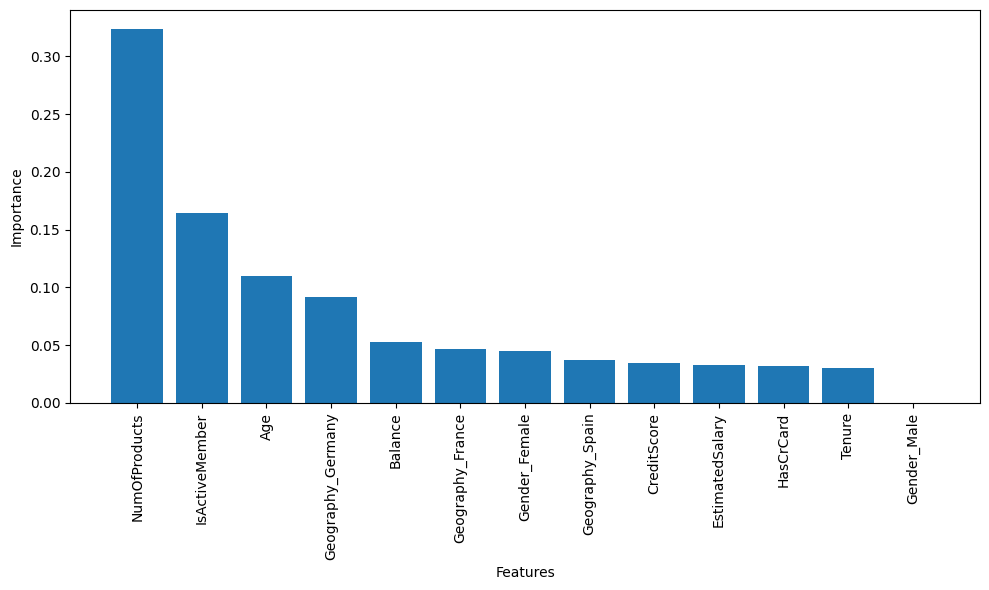

In [40]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

So from the important features let’s create new features:

In [41]:
# Done to scale down the balance values to a more manageable range for analysis or modeling

features['CLV'] = df['Balance'] / 10000

In [43]:
# New feature: Age group
# Assigning values to a new column named AgeGroup within the features DataFrame

features['AgeGroup']= pd.cut(features['Age'], bins=[0,30,45,60,100], labels=['Young', 'Middle-Aged', 'Senior' , 'Elderly'])

In [47]:
# New Feature: ratio of the customer
# Creates a new feature that represents the ratio of a customer's tenure (time with the company) to their age

features['TenureAgeRatio'] = df['Tenure'] / df['Age']

In [45]:
#handle categorical variables through "ONE-HOT ENCODING"

features = pd.get_dummies(features, drop_first=True )

In [58]:
# Data-Splitting:

x_train , x_test , y_train , y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# This line (^) splits the data into training and testing sets using "train_test_split".
# x_train and y_train: The data the model learns from, like chapters and practice questions a student studies.
# x_test and y_test: The data used to evaluate the model's performance, like final exam questions the student has not seen before.

x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_Middle-Aged,AgeGroup_Senior,AgeGroup_Elderly
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,11.962460,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,11.473992,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,13.563700,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,14.214732,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,6.971274,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,19.022746,0.186047,True,False,False


In [59]:
# XGBoost with feature engineering
# Feature engineering helps to improve the model's performance by creating new informative features
# XGBoost effectively learns from the data to make accurate predictions

xgb_model = xgb.XGBClassifier(random_state= 42)
evaluate_and_save_model(xgb_model, x_train, x_test, y_train, y_test, 'xgb_model_feature_engineered')

XGBClassifier Accuracy: 0.8665

Classification Report of xgb_model_feature_engineered in (Tabular Format):
              precision    recall  f1-score    support
0              0.889082  0.952707  0.919796  1607.0000
1              0.726619  0.513995  0.602086   393.0000
accuracy       0.866500  0.866500  0.866500     0.8665
macro avg      0.807851  0.733351  0.760941  2000.0000
weighted avg   0.857158  0.866500  0.857366  2000.0000
Model saved as /content/drive/MyDrive/Machine_Learning_Models/Customer_Churn_Prediction/xgb_model_feature_engineered.pkl


From Creating New Features through Feature Engineering our **recall decreased from 0.536 to 0.513* but **accuracy increased from 0.74 to 0.86 (10% increase)**

2. **SMOTE**:
SMOTE is employed as a preprocessing step to handle class imbalance before training the XGBoost model

In [68]:
# Checking class/category distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

Class distribution before SMOTE:
Exited
0    6356
1    1644
Name: count, dtype: int64


In [69]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [70]:
# Check the balance after applying SMOTE
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution after SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64


In [71]:
# Train the XGBoost model with the resampled data
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgboost_model, x_train_resampled, x_test, y_train_resampled, y_test, 'xgboost_featureEngineered_with_SMOTE.pkl')

XGBClassifier Accuracy: 0.8575

Classification Report of xgboost_featureEngineered_with_SMOTE.pkl in (Tabular Format):
              precision    recall  f1-score    support
0              0.893921  0.933416  0.913242  1607.0000
1              0.667702  0.547074  0.601399   393.0000
accuracy       0.857500  0.857500  0.857500     0.8575
macro avg      0.780812  0.740245  0.757320  2000.0000
weighted avg   0.849469  0.857500  0.851965  2000.0000
Model saved as /content/drive/MyDrive/Machine_Learning_Models/Customer_Churn_Prediction/xgboost_featureEngineered_with_SMOTE.pkl.pkl


 By applying SMOTE on new training data our **recall increased from 0.536 to 0.547** and **accuracy increased from 0.74 to 0.85 (9% increase)**

3. **Voting Classifier**:

Ensembling is a broad machine learning technique where multiple models are combined to make predictions, aiming to improve overall performance compared to using a single model.

It's like having a team of experts with different perspectives to make better decisions.

Voting Classifier is a specific type of ensemble method. It combines predictions from multiple different models (classifiers or regressors) by either:

1. Hard Voting: Each model "votes" for a class, and the class with the most votes wins.
2. Soft Voting: Each model assigns probabilities to each class, and the class with the highest average probability wins.

In [84]:
# Hard Voting
voting_clf = VotingClassifier(
    estimators=[
        ('xgboost', xgb.XGBClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(random_state=42, probability=True))
    ],
    voting='hard'
)

In [83]:
# Soft Voting
voting_clf = VotingClassifier(
    estimators=[
        ('xgboost', xgb.XGBClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(random_state=42, probability=True))
    ],
    voting='soft'
)

In [85]:
# Evaluate the Voting Classifier
evaluate_and_save_model(voting_clf, x_train_resampled, x_test, y_train_resampled, y_test, 'voting_classifier.pkl')

VotingClassifier Accuracy: 0.8605

Classification Report of voting_classifier.pkl in (Tabular Format):
              precision    recall  f1-score    support
0              0.902424  0.926571  0.914338  1607.0000
1              0.662857  0.590331  0.624495   393.0000
accuracy       0.860500  0.860500  0.860500     0.8605
macro avg      0.782641  0.758451  0.769417  2000.0000
weighted avg   0.855349  0.860500  0.857384  2000.0000
Model saved as /content/drive/MyDrive/Machine_Learning_Models/Customer_Churn_Prediction/voting_classifier.pkl.pkl


 By applying FEATURE ENGINEERING, SMOTE and VOTING CLASSIFIER on our training data out **recall increased from 0.536 to 0.590** and **accuracy increased from 0.74 to 0.86 (10% increase)**